# <center>Øving 1</center>
Torbjørn Bakke
### a)

In [61]:
# Import relevant libraries
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [89]:
# Import data from file
lwData = pd.read_csv("length_weight.csv", names=['length', 'weight'])

x_in_a = lwData['length'][1:].astype(np.float32).values
y_in_a = lwData['weight'][1:].astype(np.float32).values

x_train_a = torch.tensor(x_in_a)[:750].reshape(-1, 1)
y_train_a = torch.tensor(y_in_a)[:750].reshape(-1, 1)

x_test_a = torch.tensor(x_in_a)[750:].reshape(-1, 1)
y_test_a = torch.tensor(y_in_a)[750:].reshape(-1, 1)

# Create linear regression model
class LinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)  
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self, x):
        return x @ self.W + self.b  

    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))
    
model = LinearRegressionModel()


# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], 0.0001)
for epoch in range(10000):
    model.loss(x_train_a, y_train_a).backward()
    optimizer.step()
    optimizer.zero_grad()
    
# Print model variables and loss
print("W = %s\nb = %s\nloss = %s" 
      % (model.W, model.b, model.loss(x_trainA, y_trainA)))

W = tensor([[0.1468]], requires_grad=True)
b = tensor([[-0.8698]], requires_grad=True)
loss = tensor(4.1035, grad_fn=<MeanBackward0>)


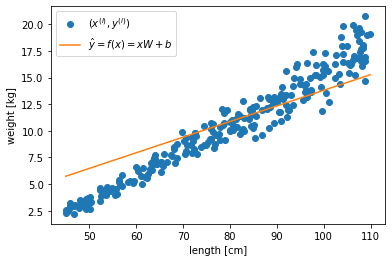

In [90]:
# Plotting test data
plt.plot(x_test_a, y_test_a, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('length [cm]')
plt.ylabel('weight [kg]')

# Plotting model based on training data
x = torch.tensor([[torch.min(x_train_a)], [torch.max(x_train_a)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()